<h1 style="text-align: center;">Intro to Data Science in R</h1>
<p style="text-align: center;"><i>✨ a workshop for Hack The North 2021 ✨</i></p>

<p style="text-align: center;"><img style="box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);" width="25%" src="./images/cover.png" /></p>


### Goals 🎯

1. Describe, at a high-level, what data science is all about, i.e., the concepts behind the code
2. Be able to write basic R code that reads, explores, and processes data sets. This is the meat and potatoes of today
3. Make a model “useful” by publishing it for others to access. This is a hackathon, so we always want to keep this in mind

### Links 🔗

- **GitHub repository:** Source code [here](https://github.com/michaelfromyeg/data-science-for-people-in-a-hurry).
- **Data set:** Available [here](https://www.kaggle.com/mylesoneill/world-university-rankings).
- **Workshop slides** Available [here](https://docs.google.com/presentation/d/e/2PACX-1vSHjvmcgEvDLyE67BLr3S67f-Q3d0VRRaMTAoYFR4p36LJFrIpuZK3igBuXK6g_7-TWCEX1hkVI9j1O/pub?start=false&loop=false&delayms=30000).


### Resources 📚

Here's a few supplementary resources (that helped inspire this workshop's content)—I highly recommend you take a look at them!

* [R Workshop Notes](http://tutorials.iq.harvard.edu/R/Rintro/Rintro.html)
    * From Harvard; serves a solid introduction to R.
* [Learn X in Y Minutes: R](https://learnxinyminutes.com/docs/r/)
    * A quick way of catching up on R syntax quirks.
* [Introduction to Data Science](https://ubc-dsci.github.io/introduction-to-datascience/index.html)
    * The free and open-source textbook for UBC’s introductory data science course!
* [putrinprod.com](https://putrinprod.com/)
    * Various guides and resources for getting your R code in production.

In [1]:
# If you encounter any issues with the installation (the red block below will show an angry message) then let the workshop lead know!

# Uncomment these lines if necessary!
# install.packages("testthat")
# install.packages("IRdisplay")
# install.packages("tidyverse")
# install.packages("tidymodels")
# install.packages("naniar")
# install.packages("plotly")

In [2]:
library(testthat)
library(IRdisplay)
library(tidyverse)
library(tidymodels)
library(naniar)
library(plotly)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::edition_get()   masks testthat::edition_get()
✖ dplyr::filter()        masks stats::filter()
✖ purrr::is_null()       masks testthat::is_null()
✖ dplyr::lag()           masks stats::lag()
✖ readr::local_edition() masks testthat::local_edition()
✖ dplyr::matches()       masks tidyr::matches(), testthat::matches()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ───────────────────────────────────────────────────────────── tidymodels 0.1.3 ──



### Getting Started with R 🐱‍💻

R can be sometimes a bit tricky to read. Here's the basic syntax you need to know for today.

- Assigning a variable
- Method calls
- Parameters
- Printing to your notebook cell's output

We'll learn each of these as we go, but up front, let's get comfortable with variables.


In [3]:
# Variables

## Hold on to data (allow you to save a result or calculation)
## Can "change" (i.e., vary, hence variable)
## Once created, available anywhere in your program 
## (including later blocks of code)

## To assign a variable in R, we use a fancy arrow, "<-"
## The arrow means, take the thing on the right hand side and save it
## to the variable on the left

5 + 4        # Here, we're not saving the result of "5 + 4" anywhere
x <- 5 + 4   # Here, we save it to x

[1] 9

Once we've assigned a value to a variable, we'll often want to print it's contents to the output of a given cell.

In [4]:
# Printing data

## To print any data in R, we can simply "put" the variable on its own line
## If you want to be more explicit about it you can also write `print(my_variable)`
## Note the syntax here and lack of spaces. We write print(...), where ... is the variable we want to print. 
## It's often said that the ... is "wrapped" by parentheses.

# All three of these lines will print the value of x

x # Remember: we can access x down here!
print(x)
print(x + 2)

[1] 9

[1] 9
[1] 11


In [5]:
# Your turn: in this cell, create a variable y that is equal to 7. 
# Then, created a variable z that is equal to the sum of x and y.
# Finally, print z

### BEGIN SOLUTION ###

y <- 7
z <- x + y
z

### END SOLUTION ###

[1] 16

In [6]:
# There'll be tests throughout this notebook to help make sure you're on the right track! If the tests work
# (i.e., you solved the problem right), you should just see: "Test passed"

test_that("y is correct", {
  expect_equal(y, 7)
})
test_that("z is correct", {
  expect_equal(z, 16)
})

Test passed 😀
Test passed 😀


In [7]:
# Your turn: change the value of x. Does the value of z change? Why or why not?

### BEGIN SOLUTION ###

x <- 0
z

# The value of z doesn't change, since it's been assigned to old x plus y; changing x doesn't change this sum 
# (this is subtle!)

### END SOLUTION ###

[1] 16

In [8]:
test_that("x has been changed", {
  expect_true(x != 9)
})

Test passed 🥳


Now that we're familiar with variables, printing, and a few simple data types, let's talk briefly about functions.

In [9]:
# Functions

## This concept is very similar to math. Your classic y = f(x) is verymuchso the same concept in programming, 
## under the same name. We use functions to map 0-to-many inputs (called parameters, or arguments) to an 
## output, often called the result or return value. 

## The general form of a function *call* (this means we're using the function, that is, producing our y value) is,
## result <- my_function(argument1, argument2, ..., argumentN) [see how this mirrors y = f(x)?]

## When working with R, we very rarely create our own function (such as, saying h(x) = (x + 3) / 2), but we do use other
## people's functions. Let's practice that!

# This function converts a given argument temp_F, a temperature in Farenheit, to degrees Celcius
# If this looks scary, don't worry! We'll almost never have to write our own functions in R
fahrenheit_to_celsius <- function(temp_F) {
  temp_C <- (temp_F - 32) * 5 / 9
  return(temp_C)
}

how_hot <- fahrenheit_to_celsius(32)
how_hot

[1] 0

In [10]:
## Your turn: call the print function twice. First, with the number 5, and second, with the value "Hack The North" (in quotes).

### BEGIN SOLUTION ###

print(5)
print("Hack The North")

### END SOLUTION ###

[1] 5
[1] "Hack The North"


Rome wasn't built in a day, and neither was a data scientist's notebook. We need to import functions from around the internet to move along a bit faster. We say that we import a "library" in our project to provide access to helpful new functions.

In [11]:
# Libraries

## To get access to more functions that are already "built in" to R, we need to access things called libraries.
## You can think of libraries as collections of functions that make R much more powerful. 
## For today's workshop, we just need one library, called tidyverse. To import a library, we use the library(...) function;
## it accepts a library's name as the parameter (not as a string, just the actual text name).

## P.S. Sometimes, we need to install a library first before we use it. To do this, just run install.packages("...") where
## ... is the name of the desired library.

# Here's an example

# install.packages("dplyr")
# library(dplyr)

In [12]:
## Your turn: install the caret package and import it 

### BEGIN SOLUTION ###

# install.packages("caret")
library(caret)

### END SOLUTION ###

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift




In [13]:
dp <- createDataPartition(iris$Species)
test_that("caret is imported", {
  expect_equal(exists("dp"), TRUE)
})

Test passed 🥳


### Reading in a Data Set 📖

Now that we're somewhat familiar with R syntax, we can begin reading in our data set. We're working with data from Kaggle on [World University Rankings](https://www.kaggle.com/mylesoneill/world-university-rankings). Our goal is to better understand how factors like `quality_of_education`, `publications`, and `patents` impact a university's "score."

The data set is a available as a "comma-separated values" file or CSV. It's a simpler version of a spreadsheet (think: `.xlsx`) that you've likely seen over the years. We can read it in using a library function called `read_csv`.

In [14]:
# The argument given to `read_csv` is a "path"; without getting into the nitty-gritty, it specifies where the file exists on your computer. You can also pass in URLs.
university_df <- read_csv("./data/university_data.csv")

Rows: 2200 Columns: 14

── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): institution, country
dbl (12): world_rank, national_rank, quality_of_education, alumni_employment...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [15]:
# Your turn: print out the data we just imported

### BEGIN SOLUTION ###

university_df

### END SOLUTION ###

world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Harvard University,USA,1,7,9,1,1,1,1,NA,5,100.00,2012
2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NA,1,91.67,2012
3,Stanford University,USA,3,17,11,5,4,2,2,NA,15,89.50,2012
4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NA,50,86.17,2012
5,California Institute of Technology,USA,4,2,29,7,37,22,22,NA,18,85.21,2012
6,Princeton University,USA,5,8,14,2,53,33,26,NA,101,82.50,2012
7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NA,26,82.34,2012
8,Yale University,USA,6,14,31,12,14,6,15,NA,66,79.14,2012
9,Columbia University,USA,7,23,21,10,13,12,14,NA,5,78.86,2012


In [16]:
test_that("university data is read in correctly", {
  expect_equal(nrow(university_df), 2200)
})

Test passed 🥳


Woah! That's a lot of data. Perhaps there's a way we could print slightly _less_ information?

In [17]:
# Your turn: print only the first six rows of the data set by calling the "head" function (from the tidyverse library) with university_df as th one and only argument.

### BEGIN SOLUTION ###

head(university_df)

### END SOLUTION ###

world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Harvard University,USA,1,7,9,1,1,1,1,NA,5,100.00,2012
2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NA,1,91.67,2012
3,Stanford University,USA,3,17,11,5,4,2,2,NA,15,89.50,2012
4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NA,50,86.17,2012
5,California Institute of Technology,USA,4,2,29,7,37,22,22,NA,18,85.21,2012
6,Princeton University,USA,5,8,14,2,53,33,26,NA,101,82.50,2012


In [18]:
# Your turn: read in the data from the URL stored in "url" and assign it to variable called old_faithful. Print it out using head.
# Notice that we don't need to assign column names!

url <- "https://raw.githubusercontent.com/barneygovan/from-data-with-love/master/data/faithful.csv"

### BEGIN SOLUTION ###

old_faithful <- read_csv(url)
head(old_faithful)

### END SOLUTION ###

Rows: 272 Columns: 2

── Column specification ───────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): eruptions, waiting


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



eruptions,waiting
<dbl>,<dbl>
3.600,79
1.800,54
3.333,74
2.283,62
4.533,85
2.883,55


In [19]:
test_that("old faithful data is read in correctly", {
  expect_equal(nrow(old_faithful), 272)
})

Test passed 😀


Aside from printing just the first six rows, we can also use `tail` to print the end rows.

In [20]:
## Your turn: do the same with tail. 

### BEGIN SOLUTION ###

tail(university_df)

### END SOLUTION ###

world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
995,King Abdulaziz University,Saudi Arabia,4,367,449,218,595,430,645,994,839,44.03,2015
996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969,816,44.03,2015
997,Alexandria University,Egypt,4,236,566,218,997,908,645,981,871,44.03,2015
998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975,824,44.03,2015
999,University of A Coruña,Spain,40,367,567,218,886,974,812,975,651,44.02,2015
1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981,547,44.02,2015


### Processing our data ⚒️

Great, now we understand what our data looks like! To produce the result we want, we might want to reduce the scope of our analysis, or filter out bad rows. What if we want to only see data from Canadian universities, for example?

To solve problems like this, we need to use filter.

In [21]:
## Filter accepts two arguments. The first is your data, and the second is the condition. Conditions can be:
## exactly equal ==
## greater than > (or, greater than or equal to >=)
## less than < (or, less than or equal to <=)

## Conditions must produce a true or false value. Let's try working with true and false before we use filter.

## Here are some example boolean values in R

FALSE
TRUE
3 + 3 == 6
3 + 3 != 6 # This is "does not equal"
100 > 0
0 < 100

[1] FALSE

[1] TRUE

[1] TRUE

[1] FALSE

[1] TRUE

[1] TRUE

In [22]:
## Your turn: print the result of 5 == 4. Print the result of 5 == 5. Notice anything interesting about true and false
## (think: in terms of spelling, capitalization, or punctuation)

### BEGIN SOLUTION ###

5 == 4
5 == 5

### END SOLUTION ###

[1] FALSE

[1] TRUE

In [23]:
## Your turn: print the result of whether or not negative one hundred is greater than zero. Save that to a variable called
## is_colder

### BEGIN SOLUTION ###

is_colder <- -100 > 0
is_colder

### END SOLUTION ###

[1] FALSE

In [24]:
test_that("is_colder is correct", {
  expect_false(is_colder)
})

Test passed 🥇


In [25]:
## Here's an example filter call, looking for all the rows where
## national_rank <= 2.

## Note that filter takes two arguments: the data frame, and then an expression that returns either true or false based
## on a column name. Be careful with how you type the column name, casing matters!

top_national_universities_df <- filter(university_df, national_rank <= 2)
head(top_national_universities_df)

world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Harvard University,USA,1,7,9,1,1,1,1,NA,5,100.00,2012
2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NA,1,91.67,2012
4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NA,50,86.17,2012
7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NA,26,82.34,2012
14,University of Tokyo,Japan,1,32,19,31,8,19,23,NA,3,69.49,2012
16,Swiss Federal Institute of Technology in Zurich,Switzerland,1,26,66,11,40,51,44,NA,34,66.69,2012


In [26]:
## Now, it's your turn to try filtering!

## Your turn: filter all the rows where country == "Canada". Save this to a variable called "canadian_universities_df".

### BEGIN SOLUTION ###

canadian_universities_df <- filter(university_df, country == "Canada")
head(canadian_universities_df)

### END SOLUTION ###

world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,University of Toronto,Canada,1,101,101,34,7,14,18,NA,101,53.43,2012
41,McGill University,Canada,2,70,91,54,33,39,47,NA,101,51.72,2012
67,University of British Columbia,Canada,3,101,101,93,28,38,48,NA,101,47.74,2012
29,University of Toronto,Canada,1,91,81,34,2,13,12,NA,101,56.11,2013
47,McGill University,Canada,2,54,62,59,34,42,48,NA,101,50.77,2013
58,University of British Columbia,Canada,3,101,101,95,25,39,39,NA,100,48.51,2013


In [27]:
test_that("univesity data is filtered correctly", {
  expect_equal(nrow(canadian_universities_df), 72)
})

Test passed 🌈


Aside from filtering our data, we'll often want to `select` certain columns.

In [28]:
## The function we use is likewise called "select". Select's first parameter must be the data set.
## Then, every parameter after must be a column we want to keep.

## for example, selected_columns <- select(original_data, column1, column2, ..., columnN)
## You can select as many, or as few, columns as you want

university_small_df <- select(university_df, institution, country)
head(university_small_df)

institution,country
<chr>,<chr>
Harvard University,USA
Massachusetts Institute of Technology,USA
Stanford University,USA
University of Cambridge,United Kingdom
California Institute of Technology,USA
Princeton University,USA


In [29]:
## Your turn: select only the national_rank, world_rank, and year columns from the (original) university data. Save
## it to a variable called university_select_df

### BEGIN SOLUTION ###

university_select_df <- select(university_df, national_rank, world_rank, year)
head(university_select_df)

### END SOLUTION ###

national_rank,world_rank,year
<dbl>,<dbl>,<dbl>
1,1,2012
2,2,2012
3,3,2012
1,4,2012
4,5,2012
5,6,2012


In [30]:
test_that("university is selected correctly", {
  expect_equal(ncol(university_select_df), 3)
})

Test passed 😀


### tl;dr 💭

This entire process of selecting, filtering, and modifying data is generally referred to as "wrangling." This process is extremely important, because working with good, clean data is vital to producing a good visualization or model.

Other common operations that you'll want to take a look at after the workshop:

* `mutate` for adding new columns
* `group_by` + `summarize` for grouping and 'merging' the data
* `gather` + `spread` for tidying data

### A first visualization 💡

With R, the most common and straightforward way of creating a visualization is by using `ggplot`. `ggplot` is a really fancy R function used to create lots of different kinds of "plots", such as a bar chart, histogram, or scatter plot.

It is super powerful, and you can create *tons* of different charts with it. The only way to master `ggplot` is to experiment and try many different things. Better than try to "explain" `ggplot`, I'm going to show you some example code, and we'll pick it apart as we go along.

Here, I'll try to give you a taste of what's possible!

In [31]:
# Keep the most recent year from our data set
university_df_2015 <- filter(university_df, year == 2015)
head(university_df_2015)

world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Harvard University,USA,1,1,1,1,1,1,1,1,3,100.00,2015
2,Stanford University,USA,2,9,2,4,5,3,3,4,10,98.66,2015
3,Massachusetts Institute of Technology,USA,3,3,11,2,15,2,2,2,1,97.54,2015
4,University of Cambridge,United Kingdom,1,2,10,5,11,6,12,13,48,96.81,2015
5,University of Oxford,United Kingdom,2,7,13,10,7,12,7,9,15,96.46,2015
6,Columbia University,USA,4,13,6,9,13,13,11,12,4,96.14,2015


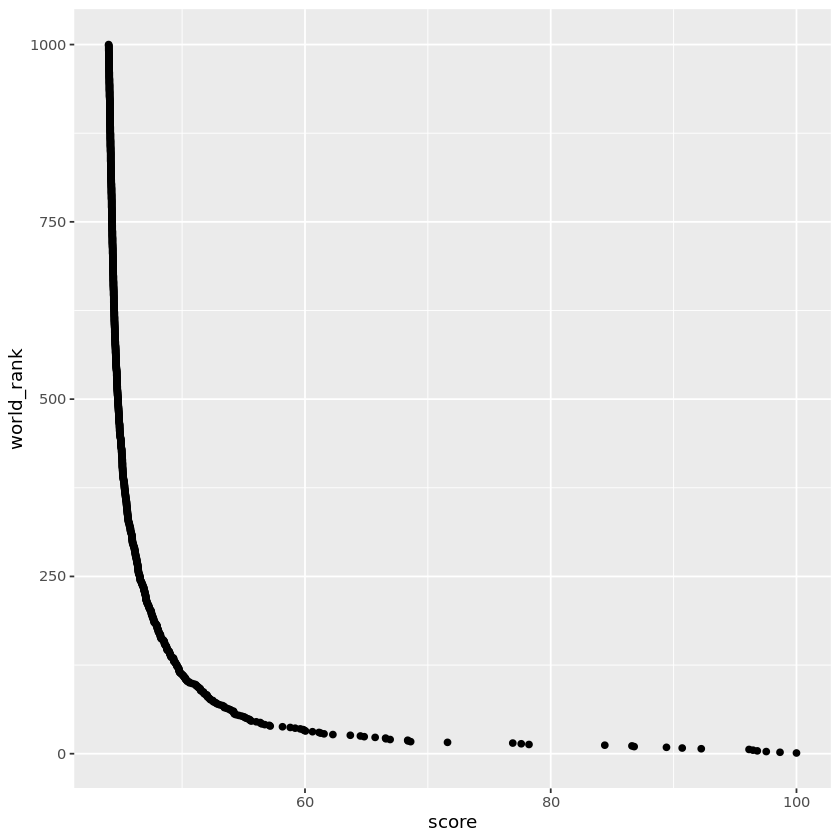

In [32]:
## Here's a basic scatterplot of the data we've gathered looking at score against world_rank
basic_plot <- ggplot(university_df_2015, aes(x = score, y = world_rank)) +
    geom_point()
basic_plot

ggplot looks scary, so let's try to break it down. Firstly, you should recognize ggplot is a function, and takes a series of arguments. The first argument is your data set. The second is the "aes", short of the "aesthetic specifications". For our purposes, this is just a function that accepts the x and y columns we'd like to use.

What is the "+" symbol at the end doing? We'll get to that in the next section.

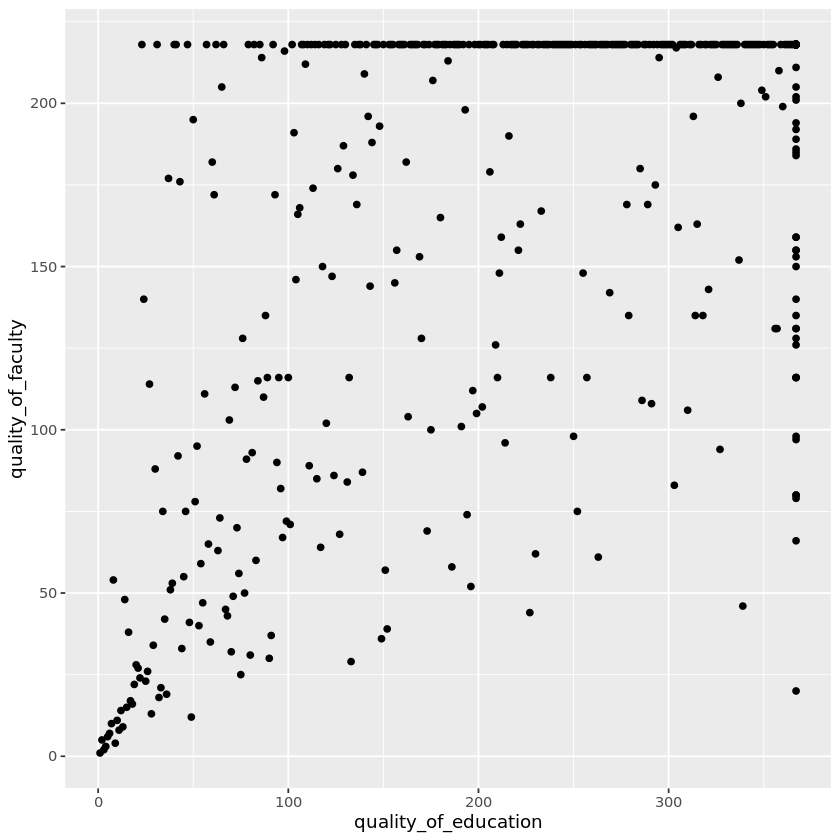

In [33]:
## Your turn: create a scatterplot with quality_of_education along the x axis and quality_of_faculty along the y axis.

## Hint: copy and paste is your friend.

### BEGIN SOLUTION

quality_plot <- ggplot(university_df_2015, aes(x = quality_of_education, y = quality_of_faculty)) +
    geom_point()
quality_plot

### END SOLUTION

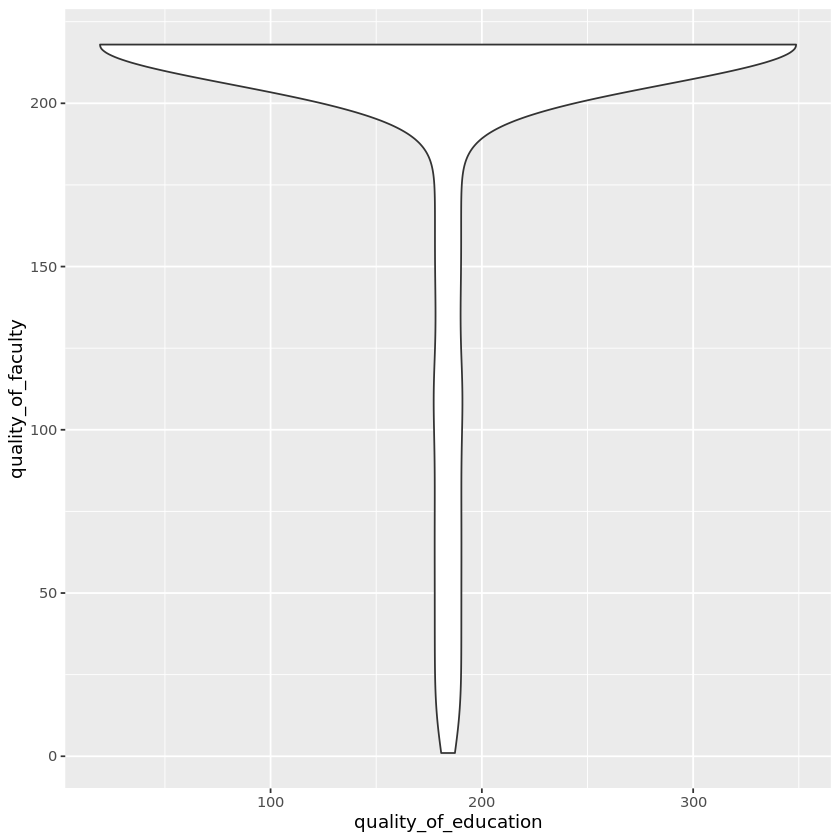

In [34]:
## Your turn: using your solution from the last cell, change "geom_point()" to "geom_violin()". What happens?

### BEGIN SOLUTION

violin_plot <- ggplot(university_df_2015, aes(x = quality_of_education, y = quality_of_faculty)) +
    geom_violin()
violin_plot

### END SOLUTION

## Psst... see a complete list of different geom_...()s you can put here: https://ggplot2.tidyverse.org/reference/

Woo hoo! You've made your first few plots ever. With practice, you'll find using ggplot to create effective visualizations is tremendously easier than trying to do the same thing in Excel. 

We can add layers to our plot to supply additional graphics; this is also useful for adding additional data, such as a single point, to our graph. Again, let's look at some sample code and I'll help break it down for you.

Here's a rather involved example.

`geom_smooth()` using formula 'y ~ x'



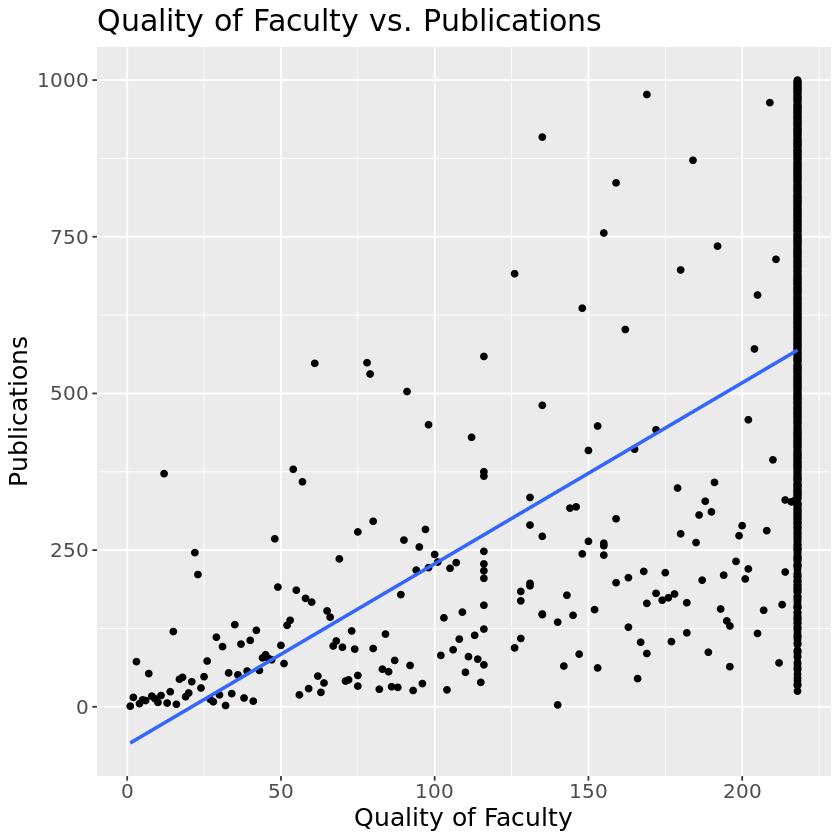

In [35]:
# NOTE: we're graphing rankings, so smaller is better.

ggplot(university_df_2015, aes(x = quality_of_faculty, 
                          y = publications)) +
    geom_point() + 
    xlab("Quality of Faculty") +
    ylab("Publications") + 
    ggtitle("Quality of Faculty vs. Publications") +
    geom_smooth(method=lm,   # Add linear regression line
                se=FALSE) +  # Don't add shaded confidence region
    theme(text = element_text(size = 15))

Notice the "+" symbol at the end of every line? This is something special we do with ggplot, usually referred to as "adding layers". We can make our visualization more complex by adding one "layer" at a time. A layer typically refers to something like geom_point()—which adds a point layer to our graph—or geom_smooth() or the countless other layers we can add, but you can also use "+" to add things like a theme to your plot, a legend, labels for your x- and y- axes, and more. The possibilities are endless!

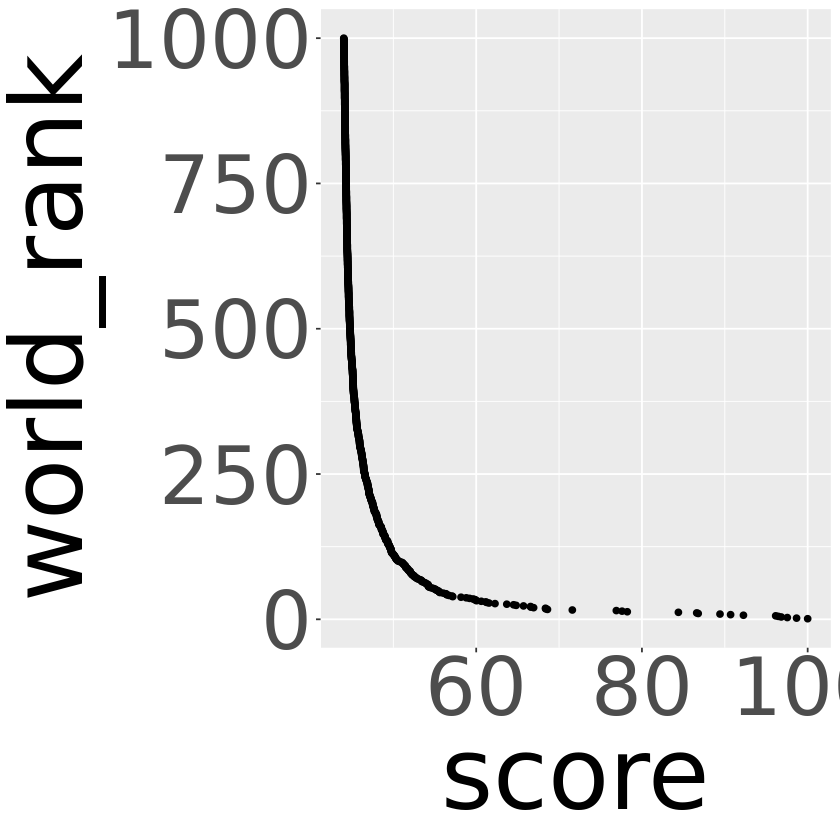

In [36]:
## Your turn: make the font size of basic_plot 60 by adding a layer. Save it to a variable called big_text_plot.

### BEGIN SOLUTION ###

big_text_plot <- basic_plot + theme(text = element_text(size = 60))
big_text_plot

### END SOLUTION ###

### A first model 🤯

We've covered a lot of really good ground. Now let's try and make your very first model!

Our goal is to use all of the qualities of a school's education, `quality_of_education`, to predict it's `score`. I'm going to have a spare a lot of the technical details, but our goal is to do two things:

1. Produce a scatter plot with our two chosen qualities
2. Draw a straight line that goes through roughly the center of those points

For _new_ observations, we can then see where the x-value falls on the straight line, and take the corresponding y-value.

Again, "show" is better than "tell", so let's take a look.

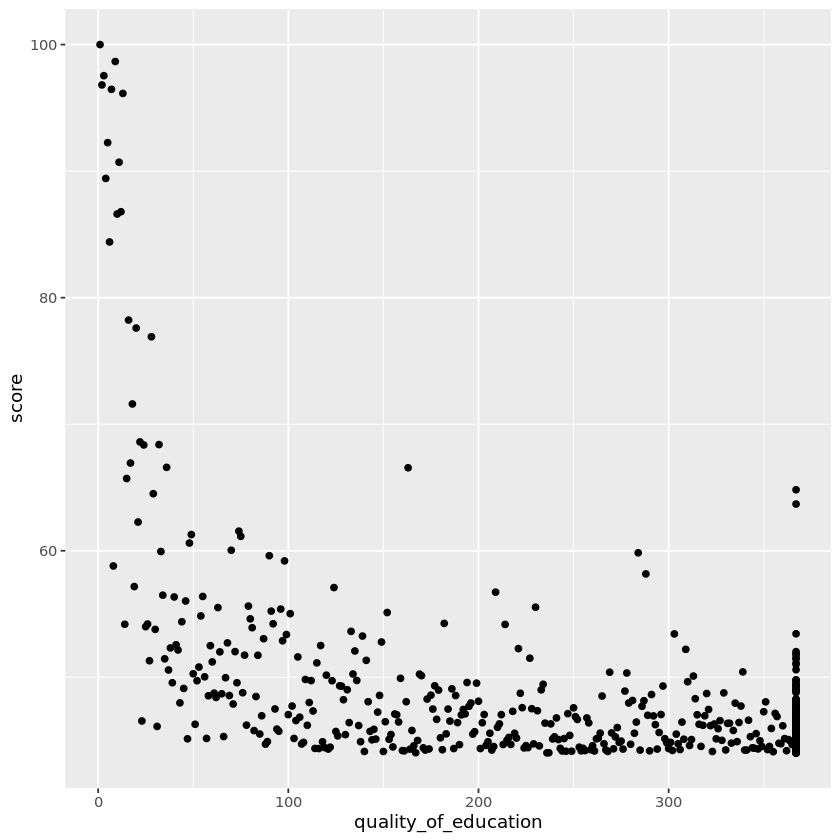

In [37]:
score_plot <- ggplot(university_df_2015, aes(x = quality_of_education, y = score)) +
    geom_point()
score_plot

From the plot, it's clear that a higher quality of education rank (which is a _lower_ number), leads to a _much_ higher score. Let's see if we can capture this relationship with a straight line somehow.

`geom_smooth()` using formula 'y ~ x'



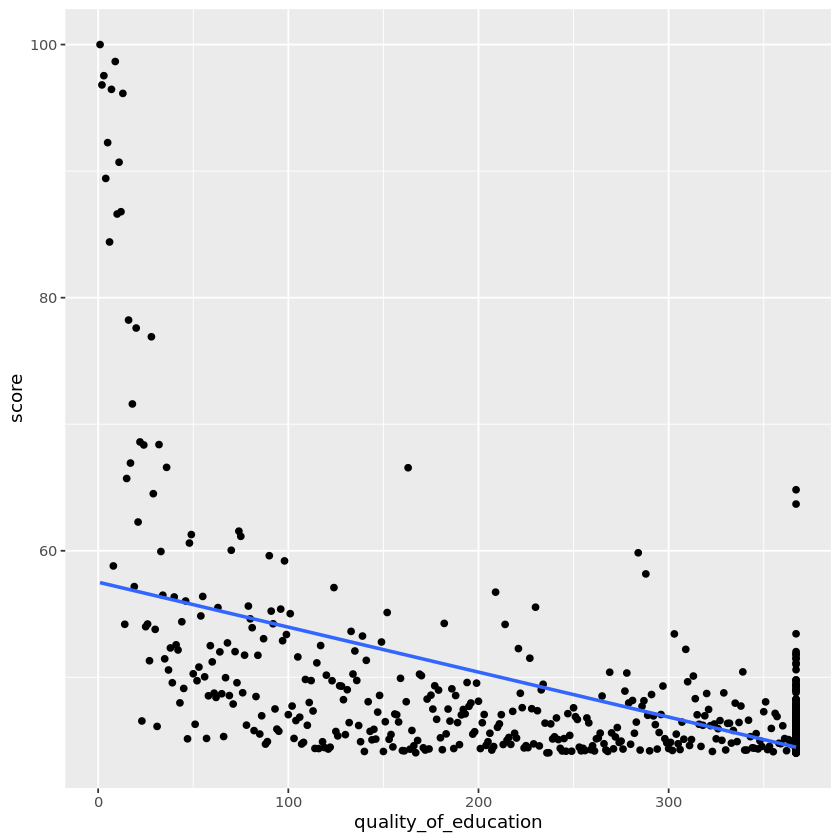

In [38]:
score_plot + geom_smooth(method=lm, se=FALSE)

Not too shabby... you can see here how adding another layer of `geom_smooth` (which produces these kind of lines) can help us turn our visualization into a model.

But what if we want the exact coefficients to make a new prediction? We'll have to use the `lm` function. Since I can't go into too much more detail, I'll provide some sample code for you below to tinker with sometime this weekend!

### Aside: `y = mx + b`

If you haven't seen this before or need a quick refresher, the idea for our prediction is based on this equation: `y = mx + b`. This equation describes a straight line using

<br />
<p style="text-align: center;"><img style="box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);" width="30%" src="./images/y-mx-b.png" /></p>

* `m`, the slope (or "steepness") of the line
* `b`, the y-intercept of the line, where it intersects with the y-axis

If we feed into an `x` value, we can get a corresponding `y`. So, we know visually what our model is, but we need to do a bit more work to get our specific `b` and `m` values.

To do something similar to `geom_smooth`, but to get the actual coefficients, we'll use `lm`. See it in use below.

In [39]:
linear_regression <- lm(quality_of_education ~ score, data=university_df_2015)
linear_regression <- tidy(linear_regression)
print(linear_regression)

coeffs <- linear_regression$estimate 

# A tibble: 2 × 5
  term        estimate std.error statistic   p.value
  <chr>          <dbl>     <dbl>     <dbl>     <dbl>
1 (Intercept)   768.      20.2        38.1 1.14e-196
2 score          -9.99     0.426     -23.4 4.13e- 97


Say we want to predict the score for a university with a `quality_of_education` rank of 50.

In [40]:
quality_of_education <- 50

In [41]:
# y = mx + b
score <- coeffs[1] + (coeffs[2]*quality_of_education)

# Print the final score!
score

[1] 268.5152

So, for a university of rank 50, we would predict a score of about 269. How cool!

### Next Steps

Today, we've managed to,

* Learn basic R syntax
* Import a data set
* Explore a data set
* Visualize a data set
* Produce a first model

Where to next? Here are some great options:

* Look up more complex models to try. [Tidymodels](https://www.tidymodels.org/) is a fantastic library that makes it really easy to get started with this.
* Deploy your code. You can't do it from Jupyter directly, but the guides on [this website](https://putrinprod.com/) can help you turn this into a kind of API.
* Learn more about visualization. There's a lot to learn with graphing... stay curious!

<p style="text-align: center;"><img style="box-shadow: 0 4px 8px 0 rgba(0, 0, 0, 0.2), 0 6px 20px 0 rgba(0, 0, 0, 0.19);" width="25%" src="./images/thats-all.jpg" /></p>